In [1]:
import numpy as np
def accuracy (y_hat, y):
    assert(y_hat.size == y.size)
    y_hat = np.array(y_hat)
    y = np.array(y)
    X = np.where(y==y_hat,1,0)
    return np.sum(X)/len(X)
    pass

In [5]:
#1a,b
from autograd.numpy import exp,log
import pandas as pd
import matplotlib.pyplot as plt
import autograd.numpy as np 
from autograd import grad 
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.animation import FuncAnimation


class LogisticRegression():
    def __init__(self, fit_intercept=True):
        
        self.lamda = 0
        self.fit_intercept = fit_intercept
        self.coef_ = None #Replace with numpy array or pandas series of coefficients learned using using the fit methods

        pass

    def loss(self,w, X, y):
        n = float(len(X))
        y_pred = np.dot(X, w)
        return -((np.sum(-(y_pred * y) + y*log(1.0 + exp(y_pred))) / n ))
        # for l1 regularised uncomment the below line and comment the other return line
        # return -((np.sum(-(y_pred * y) + log(1.0 + exp(y_pred))) / n) + self.lamda*(np.sum(np.abs(w))))
        # for l2 regularised uncomment the below line and comment the other return line
        # return -((np.sum(-(y_pred * y) + log(1.0 + exp(y_pred))) / n ) + self.lamda*(np.sum(np.dot(w.T,w))))
    def sigmoid(self,x):
        return (1/(1 + exp(-x)))

    def fit_regularised(self, X, y,batch_size = None, n_iter=200, lr=0.01, lr_type='constant'):
       
        if (self.fit_intercept):
            bias = pd.DataFrame(pd.Series([1.0 for i in range(len(X))]))
            X = pd.concat([bias,X],axis=1)
        col_len = len(X.columns)
        coef_ = np.zeros(col_len)
        for i in range(1,n_iter):
            cur =  coef_.copy()
            coef_ = cur - lr*((X.T).dot((self.sigmoid(X.dot(cur))) - y))       
        self.coef_ = coef_
        return coef_
        pass

    def fit_regularised_autograd(self, X, y, batch_size=None, n_iter=200, lr=0.01, lr_type='constant'):

        if (self.fit_intercept):
            bias = pd.DataFrame(pd.Series([1.0 for i in range(len(X))]))
            X = pd.concat([bias,X],axis=1)
        col_len = len(X.columns)
        X = np.array(X)
        y = np.array(y)
        coef_ = np.zeros(col_len)
        gradient = grad(self.loss)
        # change according to regularization
        for i in range(1,n_iter):
            cur =  coef_.copy()
            coef_ = cur + lr*(gradient(cur,X,y))       
        self.coef_ = coef_
        return coef_
        pass
        
    def predict(self, X):
     
        X_ = X.copy()
        if (self.fit_intercept):
            bias = pd.DataFrame(pd.Series([1.0 for i in range(len(X_))]))
            X_ = pd.concat([bias,X_],axis=1) 
        k = self.sigmoid(np.dot(X_,self.coef_))
        p = np.where(k<0.5,0,1)
        return pd.Series(p)
        pass

    def plot(self,X,y):
    
        b = self.coef_[0]
        w1, w2 = self.coef_[1:]
        c = -b/w2
        m = -w1/w2
        xmin, xmax = -3, 3
        ymin, ymax = -3, 3
        xd = np.array([xmin, xmax])
        yd = m*xd + c
        plt.figure()
        plt.plot(xd, yd, 'k', lw=1, ls='--')
        plt.fill_between(xd, yd, ymin, color='tab:orange', alpha=0.2)
        plt.fill_between(xd, yd, ymax, color='tab:blue', alpha=0.2)
        plt.scatter(X[y==0][:,0],X[y==0][:,1])
        plt.scatter(X[y==1][:,0],X[y==1][:,1])
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.ylabel(r'$x_2$')
        plt.xlabel(r'$x_1$')
        plt.show()
        
        pass


In [6]:
def optimum_lamda(X,y):
    LR = LogisticRegression(fit_intercept=True)
    alpha = 0.01
    maxlamda = 0
    maxaccu = 0
    for i in range (0,100):
        LR.lamda = alpha*i
        LR.fit_regularised_autograd(pd.DataFrame(X),pd.Series(y))
        y_hat = LR.predict(pd.DataFrame(X))
        accu = accuracy(y_hat,y)
        if accu >= maxaccu :
            maxaccu = accu
            maxlamda = alpha*i
    return maxlamda           





C:\Users\shahi\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shahi\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\shahi\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

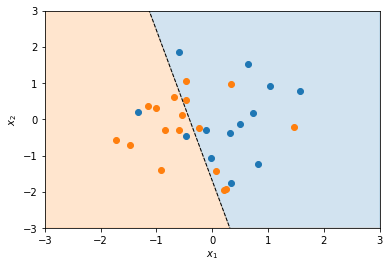

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

x = load_breast_cancer(as_frame=True)
X = x.data
minmax = MinMaxScaler()
X[list(X)]= minmax.fit_transform(X)
y = x.target
X = np.array(X)
y = np.array(y)
#for 2b
print(optimum_lamda(X,y))
k = KFold(n_splits=3)
accuracies = []

for train,test in k.split(X,y):
    batch_size = 5
    fit_intercept = True
    LR = LogisticRegression(fit_intercept=fit_intercept)
    LR.fit_regularised(pd.DataFrame(X[train]), pd.Series(y[train]),batch_size)
    y_hat = LR.predict(pd.DataFrame(X[test]))
    accuracies.append(accuracy(y_hat,y[test]))
print(accuracies)

np.random.seed(42)
N = 30
P = 2
X = pd.DataFrame(np.random.randn(N, P))
y = pd.Series([0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1])

LR = LogisticRegression(fit_intercept = True)
LR.fit_regularised(pd.DataFrame(X),pd.Series(y))
y_hat = LR.predict(pd.DataFrame(X))
print(y_hat,y)

LR.plot(np.array(X),np.array(y))


        0    1     2     3     4     5    6    7    8    9  ...   55   56  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  0.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  0.0  0.0   

       57   58    59    60    61   62   63  shah  
0     0.0  6.0  13.0  10

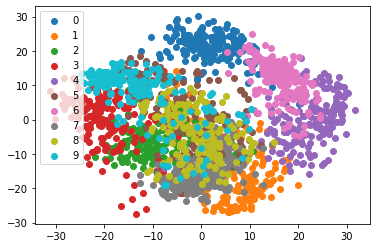

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = load_digits()
X = pd.DataFrame(digits.data)

X["shah"] = digits.target
print(X)

pca = PCA(n_components=2)
red = pca.fit_transform(X.iloc[:,:-1])
x = red[:,0]
y = red[:,1]
d = X.iloc[:,-1]
for dt in np.unique(d):
    val = np.where(d == dt)
    plt.scatter(x[val],y[val],label = dt)
plt.legend(prop = {'size':10})
plt.show()